In [1]:
import numpy as np
import scipy
from pprint import pprint
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [2]:
#simulates what compressed data would look like via svd
def svd_accuracy(A,n_e):
    u, s, vh = np.linalg.svd(A, full_matrices=True)

    S = np.zeros((u.shape[1],vh.shape[0]))
    for i in range(0,s.shape[0]):
        if i <= n_e-1:
            S[i][i] = s[i]
        else:
            break

    return u@S@vh

In [3]:
def compute_img(e_n,img_path):
    img = Image.open(img_path).convert("L")
    
    WIDTH, HEIGHT = img.size
    pixel = img.load()

    M = np.zeros((WIDTH,HEIGHT))
    for i in range(WIDTH):
        for j in range(HEIGHT):
            M[i][j] = pixel[i,j]
            
    D = svd_accuracy(M,e_n)
    for i in range(WIDTH):
        for j in range(HEIGHT):
            temp = D[i][j]
            pixel[i, j] = min(int(temp),255)
    return img

In [4]:
def cycle_greyscale(img_path="jungle.jpg"):    
    saved_imgs = []
    w,h = Image.open(img_path).size
    for i in np.logspace(1,100,endpoint=False,base=1.5,dtype=int):
        print(i)
        img = compute_img(i,img_path)
        path = '{}-{}.png'.format(img_path,i)
        saved_imgs.append(path)
        img.save(path)    
        if i > min(w,h):
            break
    return saved_imgs

In [5]:
images = ['jungle.jpg','river.jpg','tiger.jpg','trolly.jpg']
saved_imgs = []
for image in images:
    saved_imgs = saved_imgs + cycle_greyscale(img_path=image)

#temp=mpimg.imread('result.png')
#imgplot = plt.imshow(temp)

1
3
7
16
37
83
185
413
923
1
3
7
16
37
83
185
413
923
2060
4599
1
3
7
16
37
83
185
413
923
2060
4599
1
3
7
16
37
83
185


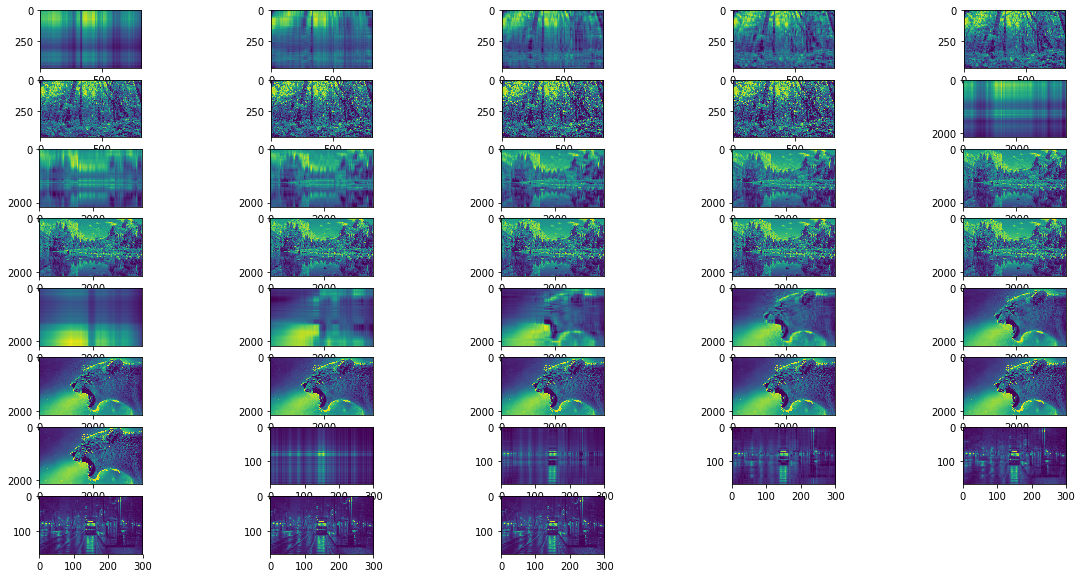

In [7]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in saved_imgs:
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)